In [4]:
print("hello great world")

hello great world


In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
     if not os.path.isdir(housing_path):
       os.makedirs(housing_path)
     tgz_path = os.path.join(housing_path, "housing.tgz")
     urllib.request.urlretrieve(housing_url, tgz_path)
     housing_tgz = tarfile.open(tgz_path)
     housing_tgz.extractall(path=housing_path)
     housing_tgz.close()
        


In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)


In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts() #used to count value in a specific row

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


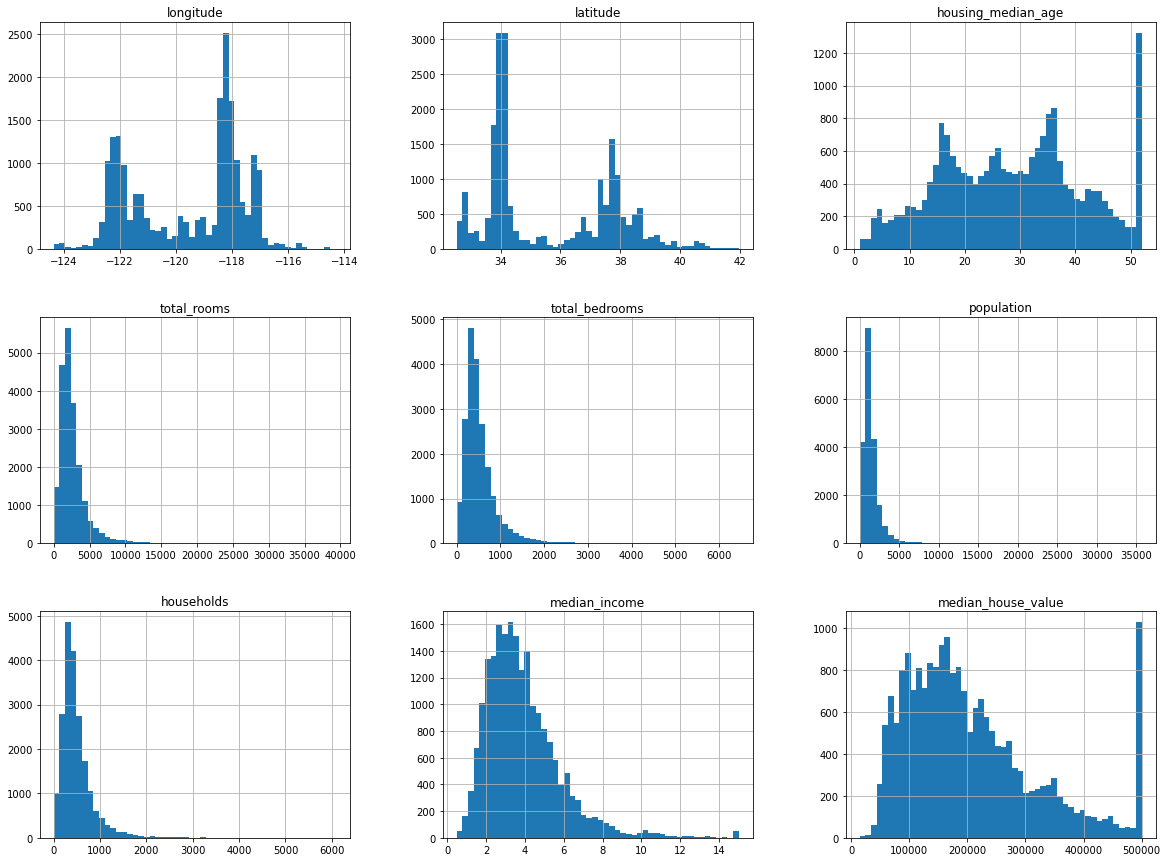

In [10]:
%matplotlib inline     
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()        # very important to show graph, where bin is number of divide strocs, 20 the with and 15 the length

In [11]:
import numpy as np
def split_train_test(data, test_ratio):
     shuffled_indices = np.random.permutation(len(data)) #use to ramdomly change the instance position
     test_set_size = int(len(data) * test_ratio) #to calculate the exact number of the ratio
     test_indices = shuffled_indices[:test_set_size] #proceed by the left of the list 
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices] #return value of list

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [13]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
  return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [18]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [19]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [20]:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)

In [21]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

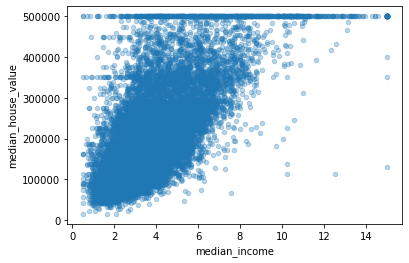

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.3)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

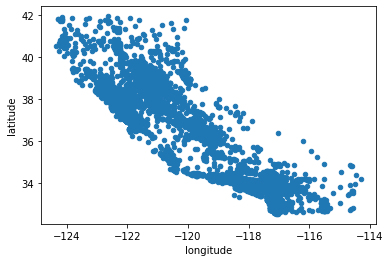

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

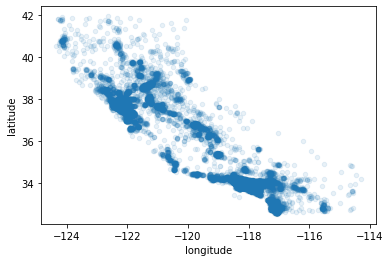

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

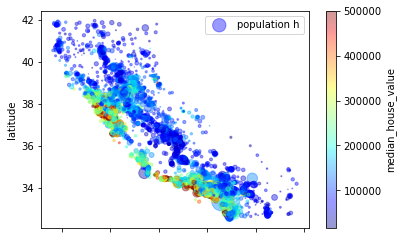

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population h",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [28]:
housing.dropna(subset=["total_bedrooms"]) # option 1 dropna drop any empty value 
housing.drop("total_bedrooms", axis=1) # option 2 drop remove all the total bedroom in the dataframe
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3 fill any missing value with the median

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] #creating new variable with the data fram so that they can see the most corrolation
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [30]:
housing
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
from sklearn.impute import SimpleImputer  
                                          # older version: from sklearn.preprocessing import Imputer // imputer = Imputer(strategy="median")
imputer = SimpleImputer(strategy="median")#sklearn provide a class that can replace missing value with the condition that you only specified what you want to replace by.here is median value

In [33]:
housing_num = housing.drop("ocean_proximity", axis=1)#removing all non numeric values since there is no median for this.


In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_ #has length all the median of values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
housing_num.median().values #same with the computing median ensuring that the imputer has not made an error

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [37]:
X = imputer.transform(housing_num) #creating the variable X where all the missing value has been replace by the learn value of imputer
                                   #transform only means converting
                                   # may also use x = imputer.fit_transform(housing_num) as an other choice

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns) #the x is in numpy array so convert into dataframe

In [39]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #with no strategie skearn will learn what it has to do by it own. but generally will convert labelencoder is use to convert text to numbers
housing_cat = housing["ocean_proximity"]                  
housing_cat_encoded = encoder.fit_transform(housing_cat) 
housing_cat_encoded
# base on my knowdelge we can also use 
# housing_cat_encoded = encoder.fit(housing_cat)
# housing_cat_encoded = encoder.transform(housing_cat)
# but i think it was not better to use it because there was no think to verified

array([1, 4, 1, ..., 0, 0, 1])

In [41]:
housing_cat_encoded1 = encoder.fit(housing_cat)

In [42]:
housing_cat_encoded1 = encoder.transform(housing_cat)
housing_cat_encoded1 #giving the same answer which is correct.

array([1, 4, 1, ..., 0, 0, 1])

In [43]:
print(encoder.classes_) #we can see that the sklearn has learn and give a numerical method that correspond to to a certain text here inland = 1, island = 2, and etc up to 4
                        # but the machine will give close relation to none close value i.e will think 1 and 0 are more lose than 4 and 0 but is not the case, base on the general data
                        # to slove it we convert into a binary attribute.

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [44]:
 from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() # a class used to convert number into binary attribute 
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #we used reshape because the fit_transform only tke a 2D where the houing encoder return an array
housing_cat_1hot  #creating a matrix whixh cannot be display because of it thousands of zeros

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
 housing_cat_1hot.toarray() #convert the matrix into an array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot #this is the compress format of all the convertion attribute.


array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 #this are indices of the columns
class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
 def __init__(self, add_bedrooms_per_room = True): # constructor with no *args or **kargs
     self.add_bedrooms_per_room = add_bedrooms_per_room  #use for putting input into the constructor.
 def fit(self, X, y=None): #creating a method fit 
     return self # nothing else to do
 def transform(self, X, y=None):
       rooms_per_household = X[:, rooms_ix] / X[:, household_ix] # end of the list to x  rooms_ix  divide by end of the household_ix
       population_per_household = X[:, population_ix] / X[:, household_ix]
       if self.add_bedrooms_per_room: #if there is any value in the constructor
         bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] #do get the number of bed per room
         return np.c_[X, rooms_per_household, population_per_household, #return the value as numpy array
         bedrooms_per_room]
       else:
         return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)# these transformer is use to add attribute


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, data_attribute):
        self.data_attribute = data_attribute
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.data_attribute].values

In [87]:
from sklearn.base import TransformerMixin
class my_label_binarizer(TransformerMixin):
    def __init__(self, *args, **kwargs): # i think this is to creates an additional space for taking 3 values
        self.encode = LabelBinarizer(*args, **kwargs)
    def fit(self, X, y = 0):
        self.encode.fit(X)
        return self
    def transform(self, X, y = 0):
        return self.encode.transform(X)

In [88]:
from sklearn.pipeline import FeatureUnion
#from sklearn_features.transformers import DataFrameSelector
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
 ('selector', DataFrameSelector(num_attribs)), #the pipeline use to show the direction of the data 
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

cat_pipeline = Pipeline([
 ('selector', DataFrameSelector(cat_attribs)), #the pipeline for the categorical attribute
 ('my_label_binarizer', my_label_binarizer()),
 ])

full_pipeline = FeatureUnion(transformer_list=[  #use to join the two pipepline 
 ("num_pipeline", num_pipeline),
 ("cat_pipeline", cat_pipeline),
 ])


In [89]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared 

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #housing prepare is the train data which has been reomve the housing median, and housing label is the test that has y only 
#also here it is learning 

LinearRegression()

In [91]:
some_data = housing.iloc[:5] #iloc is to fetch the precise amount of data is been pass inside like here is to fetch 5 
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
#Predictions: [ 303104. 44800. 308928. 294208. 368704.]
print("Labels:\t\t", list(some_labels)) #not that the prediction is too far from the value i.e underfitting the data
# to correct this, select a more powerful model, to feed the training algorithm with better features, or
# to reduce the constraints on the model

Predictions:	 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [93]:
 from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68627.87390018745

In [94]:
from sklearn.tree import DecisionTreeRegressor #trying fisrt to use a more powerfull model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [96]:
some_data = housing.iloc[:5] #iloc is to fetch the precise amount of data is been pass inside like here is to fetch 5 
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 72100. 279600.  82700. 112500. 238300.]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [109]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [110]:
 display_scores(rmse_scores)

Scores: [73663.45114059 72497.93024376 68597.93428944 69909.46628746
 70094.1616268  77386.1020914  69776.89981358 73069.76470657
 69789.48726918 70214.48821098]
Mean: 71499.96856797702
Standard deviation: 2515.2013376420223


In [111]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


In [132]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [131]:
'''from sklearn.model_selection import RandomizedSearchCV #HOMEWORK 
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)'''

"from sklearn.model_selection import RandomizedSearchCV #HOMEWORK \nparam_grid = [\n {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},\n {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},\n ]\nforest_reg = RandomForestRegressor()\ngrid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,\n scoring='neg_mean_squared_error')\ngrid_search.fit(housing_prepared, housing_labels)"

In [133]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [134]:
grid_search.best_estimator_


RandomForestRegressor(max_features=6, n_estimators=30)

In [135]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


62753.286307483206 {'max_features': 2, 'n_estimators': 3}
55552.67376669943 {'max_features': 2, 'n_estimators': 10}
52872.24472098977 {'max_features': 2, 'n_estimators': 30}
60019.27673715444 {'max_features': 4, 'n_estimators': 3}
52860.5556839425 {'max_features': 4, 'n_estimators': 10}
50791.811733283095 {'max_features': 4, 'n_estimators': 30}
58828.967605332866 {'max_features': 6, 'n_estimators': 3}
52716.74466047586 {'max_features': 6, 'n_estimators': 10}
49923.45944843984 {'max_features': 6, 'n_estimators': 30}
58036.815561968215 {'max_features': 8, 'n_estimators': 3}
52067.883661406595 {'max_features': 8, 'n_estimators': 10}
50201.89620316585 {'max_features': 8, 'n_estimators': 30}
62027.0890989805 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54157.54443711688 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58991.10636130512 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52723.25274589674 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [136]:
feature_importances = grid_search.best_estimator_.feature_importances_
>>> feature_importances

array([7.51870529e-02, 7.65931053e-02, 4.18477495e-02, 1.91568045e-02,
       1.63063675e-02, 1.79840069e-02, 1.59623633e-02, 3.19186618e-01,
       6.64960649e-02, 1.06310691e-01, 8.11450425e-02, 1.39268917e-02,
       1.41665462e-01, 6.08808507e-05, 2.18982797e-03, 5.98107009e-03])

In [161]:
 extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
>>> cat_one_hot_attribs = list(encoder.classes_) #the encoder here is labelbinarizer
>>> attributes = num_attribs + extra_attribs + cat_one_hot_attribs
>>> sorted(zip(feature_importances, attributes), reverse=True)
 #apparently only one ocean_proximity category is really useful i.e INLAND, so you could try
#dropping the others)
for i in feature_importances:
    if i > 0.018:
            print(i)

0.07518705289326276
0.076593105292414
0.041847749478892846
0.019156804536126882
0.31918661813030974
0.06649606494721017
0.10631069141553941
0.0811450424634057
0.14166546247506037


In [138]:
#now after training the data the machine is capable of working on new set of data never see. 


final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1) #removing the median value
y_test = strat_test_set["median_house_value"].copy() #putting it inside the median value
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 48,209.6

In [139]:
print("Predictions:\t",final_predictions)
final_rmse

Predictions:	 [493474.2        220703.4        217606.66666667 ... 351343.46666667
 273310.06666667 220456.66666667]


47848.95436637175

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class selectattribute(BaseEstimator, TransformerMixin):
    def __init__(self, data):
        self.data = data
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        sorted(zip(feature_importances, attributes), reverse=True)
        if grid_search.best_estimator_.feature_importances_ < 0.018:
            